<a href="https://colab.research.google.com/github/kacper-dobrow/tensorflow-course/blob/main/02_neural_net_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to nn classification with tf

Different types of classification
* Binary
* Multiclass
* Multilabel

## Creating data to view and fit

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)


In [ ]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualize the data

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


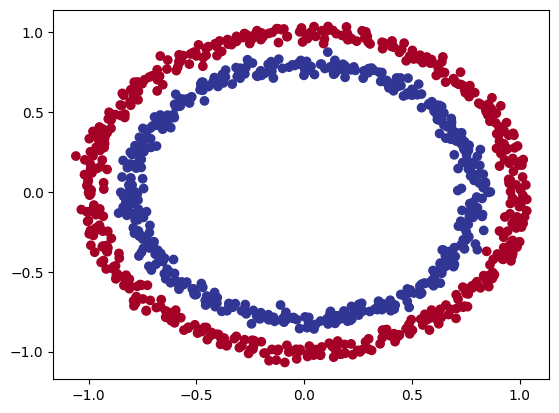

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = y, cmap = plt.cm.RdYlBu)

## Input and output shapes of our nn

In [ ]:
# check the shape of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# how many samples are there
len(X), len(y)

(1000, 1000)

In [ ]:
# view the first example of features and labels
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


## Steps in modelling

In [ ]:
# set seed for reproducibility
tf.random.set_seed(42)

# create a model
nn = tf.keras.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
nn.compile(optimizer = 'Adam',
           loss = tf.keras.losses.binary_crossentropy,
           metrics = 'accuracy') # accuracy - percentage of inputs our model got right

# fit the model
nn.fit(X,y,epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.3911 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.8324 - accuracy: 0.4800
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7943 - accuracy: 0.3850
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7755 - accuracy: 0.3430
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7605 - accuracy: 0.3210


In [ ]:
# improve by training longer
nn.fit(X,y, epochs=200, verbose = 0)
nn.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 1.0000


[0.008615142665803432, 1.0]

In [ ]:
# set seed for reproducibility
tf.random.set_seed(42)

# create a model
nn_2 = tf.keras.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
nn_2.compile(optimizer = 'Adam',
           loss = tf.keras.losses.binary_crossentropy,
           metrics = 'accuracy') # accuracy - percentage of inputs our model got right

# fit the model
nn_2.fit(X,y,epochs = 100, verbose = 0)
nn_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 1.0000


[0.017493026331067085, 1.0]

## Improving the model

1. Create a model - increase the number of layers/neurons, activation function
2. Compile the model - different optimizer and or learning rate
3. Fit the model - on more data/for longer


In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the model
nn_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
nn_3.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.binary_crossentropy,
             metrics = 'accuracy')
# Fit
nn_3.fit(X,y,epochs = 100, verbose = 0)
nn_3.evaluate(X,y) # do NOT evaluate the model on the same data it was trained on

32/32 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.5070


[0.7033988237380981, 0.5070000290870667]

To visualize the predictions
Use the scn 'plot_decision_boundary()', which will
* Take in a trained model, features and labels
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions and line between zones


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  '''
  Plots the decision boundary created by the model predictiong on X.
  '''
  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1,X[:,1].max()+0.1
# the meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
  # create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make predictions
  y_pred = model.predict(x_in)
  # check for multiclass
  if len(y_pred[0])>1:
    print('multiclass classification')
    # reshape the predictions
    y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  # plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha = 0.7)
  plt.scatter(X[:,0],X[:,1],c = y, s = 40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 1s 2ms/step
binary classification


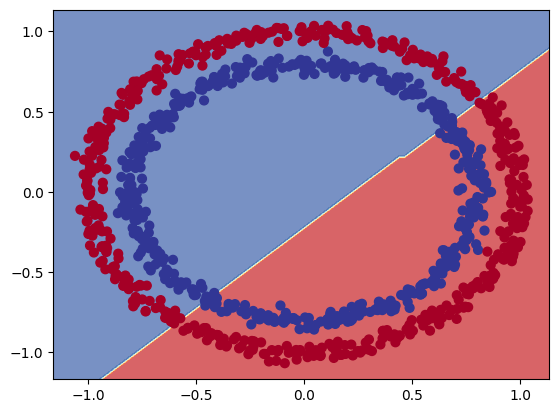

In [ ]:
# check the predictions
plot_decision_boundary(nn_3,X,y)

https://cs231n.github.io/neural-networks-case-study/

https://madewithml.com/

## The missing piece: non-linearity

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
nn_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

# compile the model
nn_4.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.binary_crossentropy,
             metrics = 'accuracy')

# fit data
history = nn_4.fit(X,y,epochs =100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3489 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 1s 26ms/step - loss: 4.1645 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0562 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0157 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9250 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6462 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5534 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4392 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3595 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2695 - accuracy: 0.5000
Epoch 11

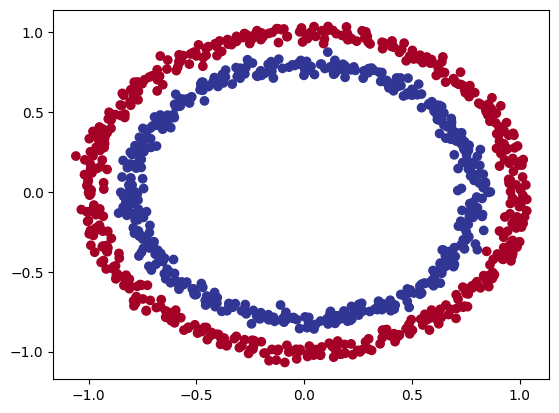

In [ ]:
# check the data
plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
binary classification


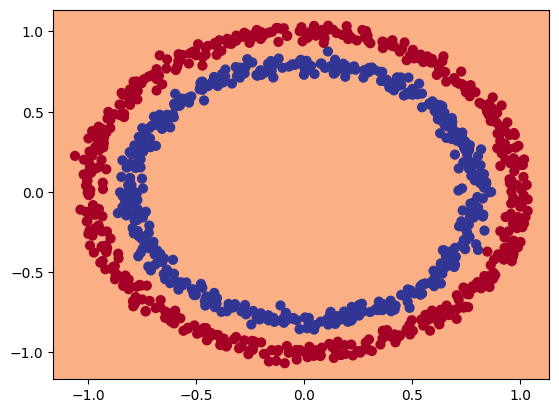

In [ ]:
# check the decision boundary
plot_decision_boundary(nn_4,X,y)

Try a nn with non-linear activation function


In [ ]:
# set seed for reproducibility
tf.random.set_seed(42)

# Create model with a non-linear activation function
nn_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

# Compile the model
nn_5.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),
             loss = tf.keras.losses.binary_crossentropy,
             metrics = 'accuracy')

# Fit the model
history = nn_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.0177 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0154 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0115 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0111 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0108 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0103 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0100 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0095 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0009 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9985 - accuracy: 0.4850
Epoch 11/

In [ ]:
# set seed for reproducibility
tf.random.set_seed(42)

# Create model with a non-linear activation function
nn_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # for binary classification. For multiclass classification we use 'softmax'
])

# Compile the model
nn_6.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = 'accuracy')

# Fit the model
history = nn_6.fit(X,y, epochs = 100, verbose=0)

313/313 [==============================] - 0s 1ms/step
binary classification


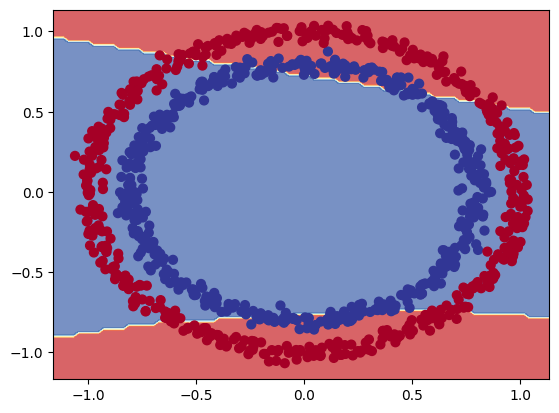

In [ ]:
plot_decision_boundary(nn_6,X,y)

In [ ]:
nn_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6140


[0.6600518226623535, 0.6140000224113464]

Demonstrating the activation function work

In [ ]:
# Create a toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

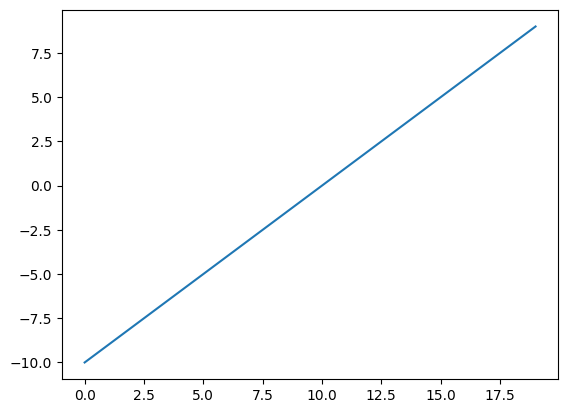

In [ ]:
# visualize the toy tensor
plt.plot(A)

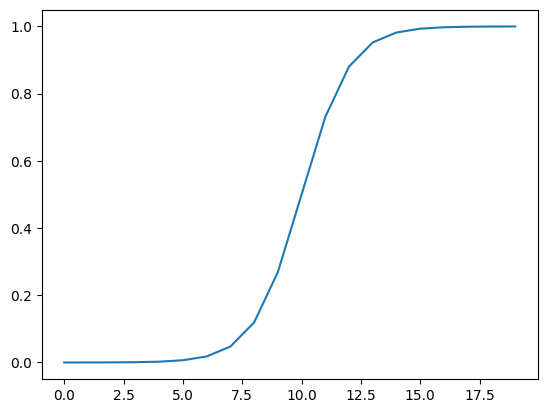

In [ ]:
# let's start by replicating sigmoid
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# use the sigmoid on A
plt.plot(sigmoid(A))

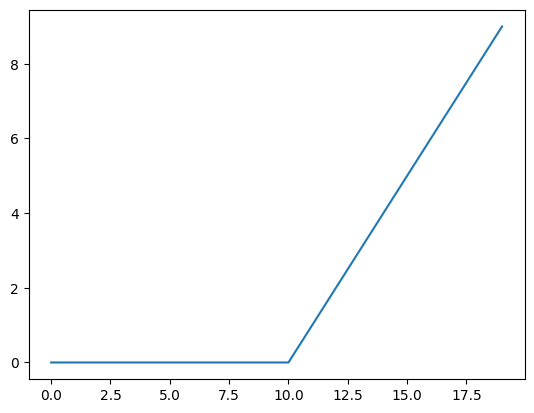

In [ ]:
# let's replicate the relu function
def relu(x):
  return tf.maximum(0,x)

# use relu
plt.plot(relu(A))

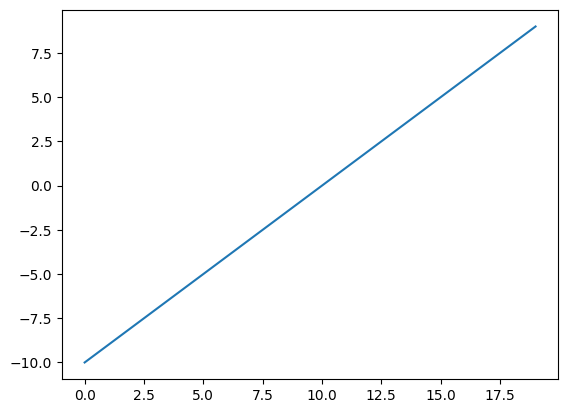

In [ ]:
#Let's try the linear activation function
plt.plot(tf.keras.activations.linear(A))

## Evaluating and improving our classification model

In [ ]:
# create the training and test set !!!  remember about sklearn training test split !!!
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
# let's create a model to fit on training data and evaluate on testing data
# set seed
tf.random.set_seed(42)

# create neural net
nn_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile
nn_8.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = 'accuracy')

# fit
history = nn_8.fit(X_train,y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6969 - accuracy: 0.4900
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5763
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5263
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6538
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6275
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6263
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.6950
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.7412
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7937
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.7937
Epoch 11/25
25/25 [

313/313 [==============================] - 0s 1ms/step
binary classification
313/313 [==============================] - 0s 1ms/step
binary classification


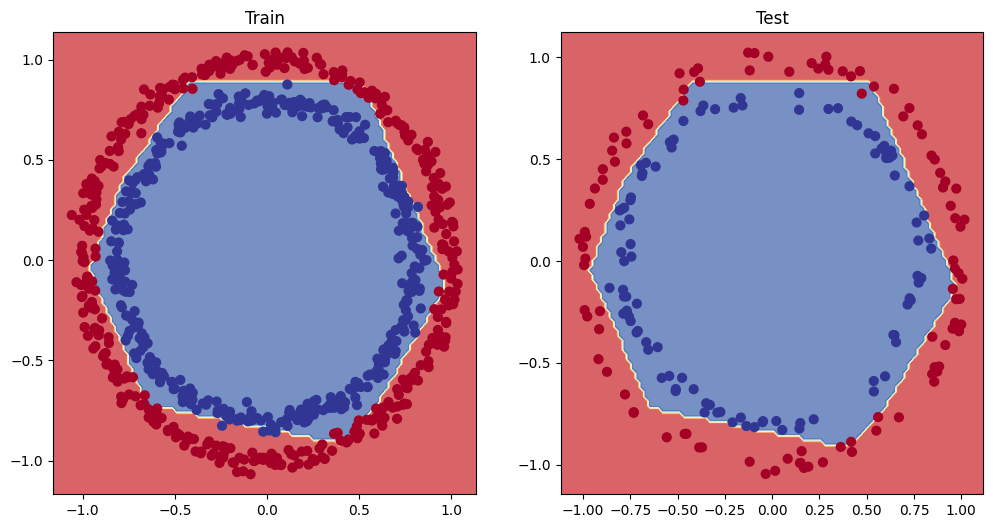

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(nn_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(nn_8,X_test,y_test)
plt.show()

In [ ]:
nn_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9750


[0.20487558841705322, 0.9750000238418579]

## Plot the training loss curves

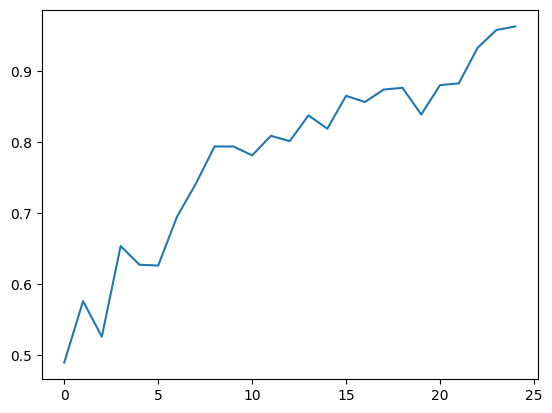

In [ ]:
plt.plot(history.history['accuracy']) # you don't have to convert it into a dataframe as it already behaves like one

Text(0.5, 1.0, 'nn_8 loss curves')

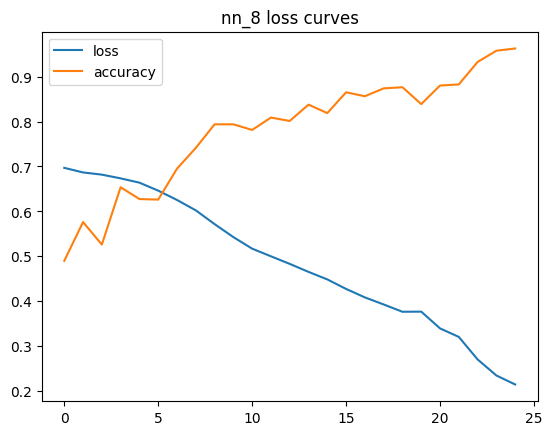

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('nn_8 loss curves')

## Finding the optimal learning_rate

To find it, we'll use the following steps
* a learning rate callback
* another model
* modified loss curves plot

In [ ]:
# set seed
tf.random.set_seed(42)

# create
nn_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile the model
nn_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(),
             metrics = 'accuracy')

# create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-2*10**(-epoch/20))

# fit
history = nn_9.fit(X_train,y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7031 - accuracy: 0.4638 - lr: 0.0100
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4700 - lr: 0.0089
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4988 - lr: 0.0079
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5075 - lr: 0.0071
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5300 - lr: 0.0063
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5300 - lr: 0.0056
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5700 - lr: 0.0050
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5850 - lr: 0.0045
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5738 - lr:

<Axes: >

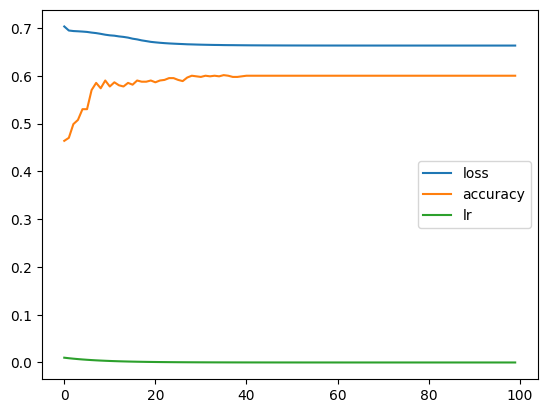

In [ ]:
pd.DataFrame(history.history).plot()

## Evaluation metrics
(false positive - someone is not ill but tested positive)

* Accuracy - all true guesses/all guesses
* precision - true positives/all positives
* Recall - true positives/(true positives+false negatives)
* F1 score = 2*preicision*recall/(precision+recall)
* confusion matrix
* Classification report (scikit learn)

In [ ]:
# check the accuracy of our model
loss, accuracy = nn_8.evaluate(X_test,y_test)
print(f'Model loss on the test det: {loss}')
print(f'Model accuracy on the test det: {accuracy}')


7/7 [==============================] - 0s 6ms/step - loss: 0.2049 - accuracy: 0.9750
Model loss on the test det: 0.20487558841705322
Model accuracy on the test det: 0.9750000238418579


## Confusion matrix

In [ ]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = tf.round(nn_8.predict(X_test)) # y_preds are in a prediction probability form so float. Need to be converted into binary

# create confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 4ms/step


array([[96,  5],
       [ 0, 99]])

Make the confusion matrix prettier

In [55]:
import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test,y_preds)
cm_norm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis] # normalize the matrix
n_classes = cm.shape[0]

# let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# create matrix plot
cax = ax.matshow(cm,cmap = plt.cm.Blues)
fig.colorbar(cax)

# create clases
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title = 'Confusion Matrix',
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# set x labels to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set treshold for different colors
threshold = (cm.max()+cm.min())/2.

# Plot text on each cell

for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment = 'center',
           color = 'white' if cm[i,j] > threshold else 'black',
           size = 15)



NameError: ignored

# Working with a larger example - multiclass classification

When you have more than 2 classes - it's multiclass classification

fashion-mnist

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [34]:
# show the first example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [35]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

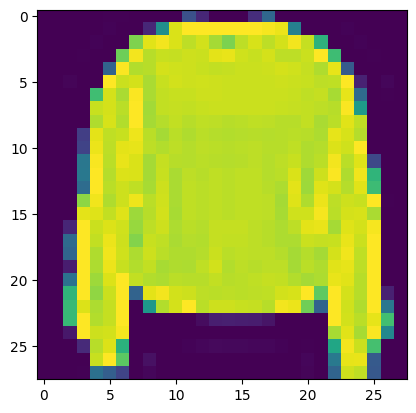

In [36]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [37]:
# create a small list so we can index on our labels so that a human can read them
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Dress')

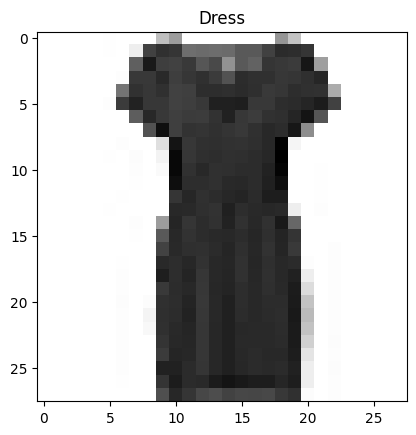

In [38]:
# plot an example image and it's label
i = 20
plt.imshow(train_data[i], cmap = plt.cm.binary)
plt.title(class_names[train_labels[i]])

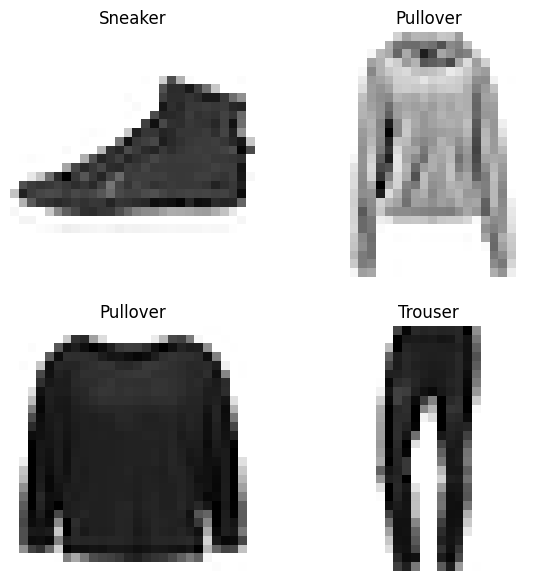

In [39]:
# plot multiple random images of fashion_mnist
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ac = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build a multiclass classification model

We can use a similar architecture as in a binary classification

* Input shape = (28, 28) - the shape of one image
* Output shape = 10 - one per class of clothing
* Loss function - tf.keras.losses.CategoricalCrossentropy()
  * for one-hot encoded labels - CategoricalCrossentropy
  * for integer encoded labels - SparseCategoricalCrossentropy
* Output layer activation - Softmax, not sigmoid

In [40]:
# Set random seed
tf.random.set_seed(42)

# Create the nn
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data[0].shape), # turns tensor into a 1-dimensional array
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax') # output shape is 10 and the output activation is different. Otherwise the same
])

# Compile the model
model_11.compile(optimizer = tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(), # CategoricalCrossentropy needs labels to be one-hot encoded. For labels in form of integers we use SparseCategoricalCrossentropy
                 metrics = 'accuracy')

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3560 - accuracy: 0.1101 - val_loss: 2.0805 - val_accuracy: 0.1757
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0499 - accuracy: 0.1777 - val_loss: 1.9891 - val_accuracy: 0.1855
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9502 - accuracy: 0.1934 - val_loss: 1.8697 - val_accuracy: 0.2300
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6685 - accuracy: 0.3169 - val_loss: 1.5233 - val_accuracy: 0.3869
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4343 - accuracy: 0.4211 - val_loss: 1.3507 - val_accuracy: 0.4559
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3167 - accuracy: 0.4638 - val_loss: 1.2954 - val_accuracy: 0.4706
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2774 - accuracy: 0.4825 - val_loss: 1.2688 - val_accuracy:

In [41]:
# Check the model summary
model_11.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Neural nets prefer scaled/normalized data - between 0 and 1
Let's divide it by the max No

In [42]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.max(), test_data_norm.max()

(1.0, 1.0)

In [48]:
# Let's build a model for normalized data

# Set random seed
tf.random.set_seed(42)

# Create the nn
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data[0].shape),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax') # the same as the previous model
])

# Compile the model
model_12.compile(optimizer = tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics = 'accuracy')

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.2389 - accuracy: 0.5360 - val_loss: 0.9422 - val_accuracy: 0.6413
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8320 - accuracy: 0.6968 - val_loss: 0.7643 - val_accuracy: 0.7219
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7120 - accuracy: 0.7371 - val_loss: 0.7112 - val_accuracy: 0.7376
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6750 - accuracy: 0.7523 - val_loss: 0.6892 - val_accuracy: 0.7457
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6538 - accuracy: 0.7593 - val_loss: 0.6812 - val_accuracy: 0.7571
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6381 - accuracy: 0.7675 - val_loss: 0.6630 - val_accuracy: 0.7591
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6266 - accuracy: 0.7765 - val_loss: 0.6675 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

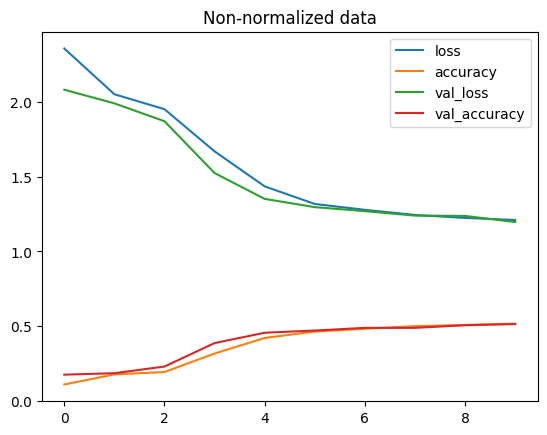

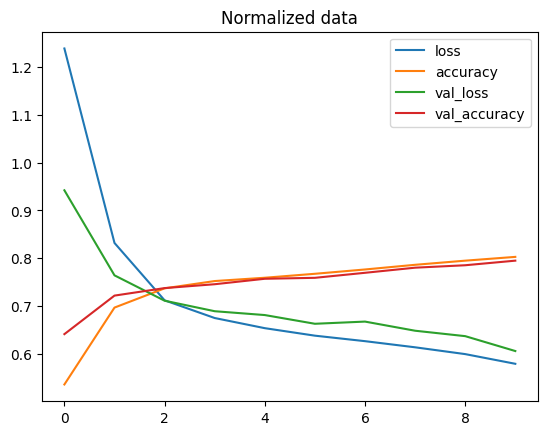

In [49]:
import pandas as pd
# plot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = 'Non-normalized data')
# plot the normalized data loss curves
pd.DataFrame(norm_history.history).plot(title = 'Normalized data')

Even slightly different data produces substantial differences in nn learning rate

## Finding the optimal learning rate

In [51]:
# Let's build a model for normalized data

# Set random seed
tf.random.set_seed(42)

# Create the nn
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data[0].shape),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax') # the same as the previous model
])

# Compile the model
model_13.compile(optimizer = tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics = 'accuracy')

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs = 40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks = lr_scheduler)

Epoch 1/40
1875/1875 [==============================] - 10s 4ms/step - loss: 1.0766 - accuracy: 0.5991 - val_loss: 0.7203 - val_accuracy: 0.7495 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6288 - accuracy: 0.7759 - val_loss: 0.6215 - val_accuracy: 0.7807 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5729 - accuracy: 0.7914 - val_loss: 0.6233 - val_accuracy: 0.7844 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5534 - accuracy: 0.7997 - val_loss: 0.5845 - val_accuracy: 0.7988 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5362 - accuracy: 0.8131 - val_loss: 0.5728 - val_accuracy: 0.8017 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5203 - accuracy: 0.8210 - val_loss: 0.5810 - val_accuracy: 0.8043 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6

Text(0, 0.5, 'Loss')

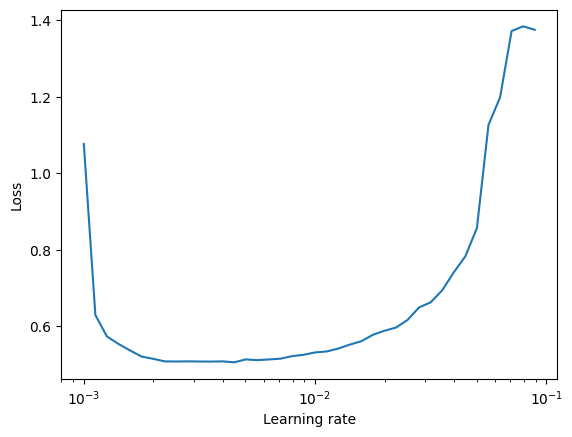

In [53]:
# plot the lr decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')

In [54]:
# Let's refit the model with ideal lr

# Set random seed
tf.random.set_seed(42)

# Create the nn
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data[0].shape),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax') # the same as the previous model
])

# Compile the model
model_14.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics = 'accuracy')

# Fit the model
history_14 = model_14.fit(train_data_norm,
                               train_labels,
                               epochs = 20,
                               validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4691 - accuracy: 0.4347 - val_loss: 1.2068 - val_accuracy: 0.5706
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0212 - accuracy: 0.6623 - val_loss: 0.8478 - val_accuracy: 0.7374
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7632 - accuracy: 0.7548 - val_loss: 0.7281 - val_accuracy: 0.7631
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6798 - accuracy: 0.7712 - val_loss: 0.6775 - val_accuracy: 0.7737
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6412 - accuracy: 0.7794 - val_loss: 0.6574 - val_accuracy: 0.7757
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6201 - accuracy: 0.7850 - val_loss: 0.6420 - val_accuracy: 0.7807
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6068 - accuracy: 0.7873 - val_loss: 0.6469 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate the model we can:
* Use other classification metrics as confusion matrix
* Assess some of its predictions through visualization
* Improve its results and see what works
* Save and reload the model



In [56]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_preds, classes = None, figsize = (10,10), text_size = 15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true,y_preds)
  cm_norm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis] # normalize the matrix
  n_classes = cm.shape[0]

  # let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # create matrix plot
  cax = ax.matshow(cm,cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # set x labels to the bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set treshold for different colors
  threshold = (cm.max()+cm.min())/2.

  # Plot text on each cell

  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
            horizontalalignment = 'center',
            color = 'white' if cm[i,j] > threshold else 'black',
            size = text_size)



In [57]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [62]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # remember to test on the same data it was trained for

# View the first 5 predictions
y_probs[0], y_probs[0].argmax(), class_names[y_probs[0].argmax()]

313/313 [==============================] - 1s 2ms/step


(array([1.83084303e-32, 3.76611849e-12, 6.86023499e-24, 1.97440500e-14,
        7.44011288e-07, 1.00325614e-01, 8.08260859e-20, 5.55930622e-02,
        4.27763490e-03, 8.39802980e-01], dtype=float32),
 9,
 'Ankle boot')

In [64]:
# Convert the prediction probabilities into integers
y_preds = y_probs.argmax(axis = 1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [65]:
confusion_matrix(test_labels,y_preds)

array([[817,   4,  24,  52,   1,   0,  87,   0,  15,   0],
       [  7, 935,   4,  37,   1,   1,   4,   0,  11,   0],
       [ 32,   1, 676,   7, 141,   0, 133,   0,  10,   0],
       [ 44,  18,   7, 780,  24,   4, 111,   0,  12,   0],
       [  2,   0, 136,  21, 721,   0, 102,   0,  18,   0],
       [  0,   3,   0,   3,   2, 868,   0,  52,  26,  46],
       [174,   3, 188,  35, 179,   0, 398,   0,  23,   0],
       [  0,   0,   0,   0,   0,  37,   0, 888,   1,  74],
       [  6,   3,  22,  10,  13,   2,  13,   5, 926,   0],
       [  0,   0,   1,   0,   0,  15,   0,  31,   1, 952]])

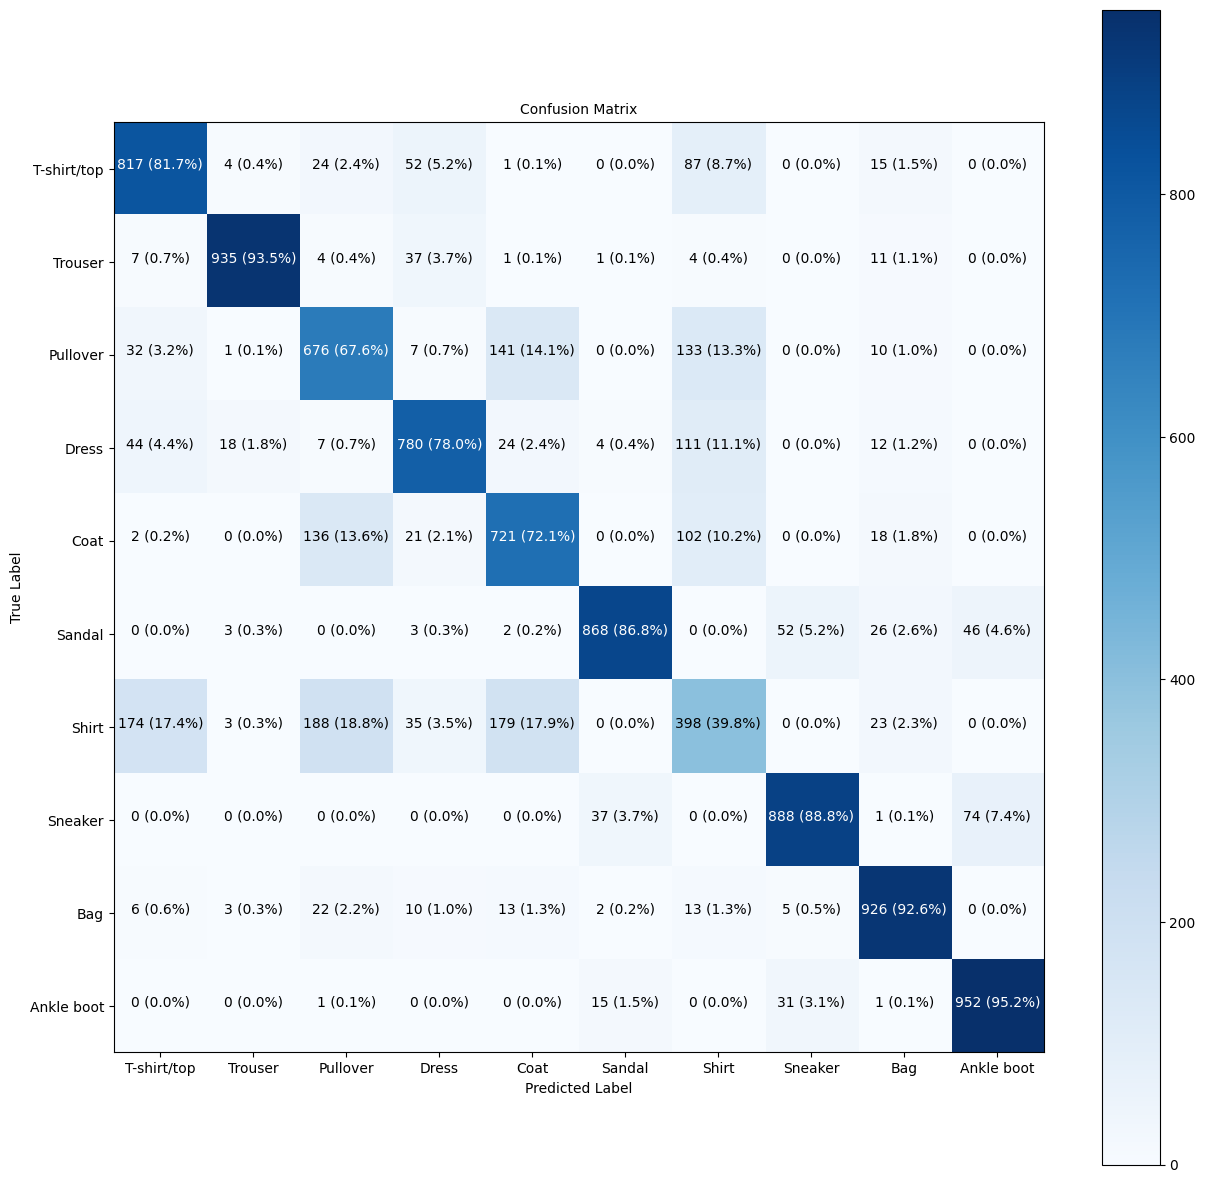

In [66]:
# Make a pretty confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_preds=y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

Let's create a function to:
* Plot a random image
* Make a prediction on the image
* Label the plot with the true and predicted label

1/1 [==============================] - 0s 19ms/step


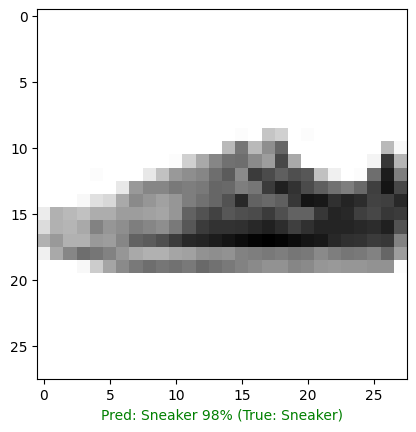

In [74]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with true and predicted labels
  """
  # set up random integer
  i = random.randint(0, len(images))

  # Create preds and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of the title depending on corrrectness of the prediction
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel to the plot
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)

plot_random_image(model = model_14,
                  images = test_data_norm, # always make predictions on the same kind of data the model was trained on
                  true_labels = test_labels,
                  classes = class_names)

## What patterns is the model learning

In [75]:
# Find the layers of our most recent model
model_14.layers

In [77]:
# Extract a particular layer
model_14.layers[1]

In [80]:
# Get weights
weights, biases = model_14.layers[1].get_weights()
weights, weights.shape

(array([[-0.0378745 ,  0.07936117,  0.59313196, -0.18511999],
        [-0.20437515,  0.5559941 ,  0.51102483, -0.7596225 ],
        [-0.9184855 ,  0.3558958 ,  0.2550412 , -0.46010178],
        ...,
        [-0.81418663,  0.29526764,  0.7137914 ,  0.24247454],
        [-0.52231866,  1.2495728 ,  0.8607914 ,  0.54992586],
        [-0.24376774,  0.35102206,  0.35308132,  0.1969794 ]],
       dtype=float32),
 (784, 4))

In [81]:
biases, biases.shape

(array([0.86834514, 2.491435  , 1.7957388 , 0.89551574], dtype=float32), (4,))

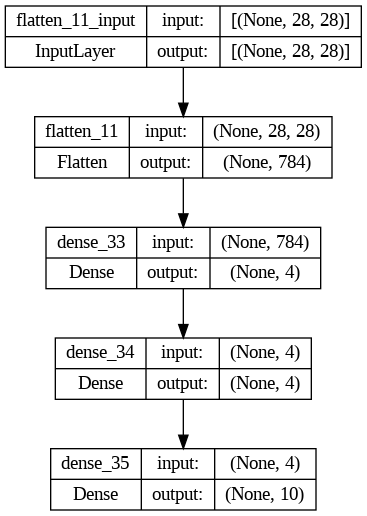

In [82]:
# !!! Apparently the 1st layer (flatten) doesn't apply any functions to the input

from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes = True)